## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  83.215144  1161.590317  0.424023  7.749902  1.431435
1   2.927309   512.388858  0.780222  6.226341  1.652616
2  88.156696   347.794992  0.026904  4.032561  0.130844
3   3.924659  1369.245488  0.902035  7.272218  1.546418
4  41.056472   535.198123  0.244732  8.202015  1.220769


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9772400	total: 57.3ms	remaining: 57.2s
1:	learn: 0.9704119	total: 57.6ms	remaining: 28.8s
2:	learn: 0.9591129	total: 58.2ms	remaining: 19.3s
3:	learn: 0.9501834	total: 58.6ms	remaining: 14.6s
4:	learn: 0.9409579	total: 59.1ms	remaining: 11.8s
5:	learn: 0.9321436	total: 59.6ms	remaining: 9.88s
6:	learn: 0.9225413	total: 60ms	remaining: 8.52s
7:	learn: 0.9119598	total: 60.5ms	remaining: 7.5s
8:	learn: 0.9016054	total: 61ms	remaining: 6.72s
9:	learn: 0.8918725	total: 61.4ms	remaining: 6.08s
10:	learn: 0.8837394	total: 61.9ms	remaining: 5.56s
11:	learn: 0.8756166	total: 62.3ms	remaining: 5.13s
12:	learn: 0.8682403	total: 63.5ms	remaining: 4.82s
13:	learn: 0.8601597	total: 63.9ms	remaining: 4.5s
14:	learn: 0.8504957	total: 64.4ms	remaining: 4.23s
15:	learn: 0.8419391	total: 64.8ms	remaining: 3.99s
16:	learn: 0.8319618	total: 65.2ms	remaining: 3.77s
17:	learn: 0.8248407	total: 65.6ms	remaining: 3.58s
18:	learn: 0.8185420	total: 66ms	remaining: 3.41s


115:	learn: 0.4026129	total: 108ms	remaining: 822ms
116:	learn: 0.3998477	total: 108ms	remaining: 818ms
117:	learn: 0.3975257	total: 109ms	remaining: 813ms
118:	learn: 0.3951402	total: 109ms	remaining: 809ms
119:	learn: 0.3928507	total: 110ms	remaining: 805ms
120:	learn: 0.3904497	total: 110ms	remaining: 800ms
121:	learn: 0.3876360	total: 110ms	remaining: 795ms
122:	learn: 0.3856043	total: 111ms	remaining: 791ms
123:	learn: 0.3831768	total: 111ms	remaining: 787ms
124:	learn: 0.3809933	total: 112ms	remaining: 782ms
125:	learn: 0.3788933	total: 112ms	remaining: 778ms
126:	learn: 0.3772170	total: 113ms	remaining: 774ms
127:	learn: 0.3747584	total: 113ms	remaining: 769ms
128:	learn: 0.3727938	total: 113ms	remaining: 765ms
129:	learn: 0.3711035	total: 114ms	remaining: 760ms
130:	learn: 0.3692901	total: 114ms	remaining: 757ms
131:	learn: 0.3671476	total: 115ms	remaining: 753ms
132:	learn: 0.3654078	total: 115ms	remaining: 749ms
133:	learn: 0.3635091	total: 115ms	remaining: 744ms
134:	learn: 

300:	learn: 0.1687476	total: 186ms	remaining: 432ms
301:	learn: 0.1682622	total: 187ms	remaining: 432ms
302:	learn: 0.1677862	total: 187ms	remaining: 430ms
303:	learn: 0.1674776	total: 187ms	remaining: 429ms
304:	learn: 0.1671213	total: 188ms	remaining: 428ms
305:	learn: 0.1662039	total: 188ms	remaining: 427ms
306:	learn: 0.1656296	total: 189ms	remaining: 426ms
307:	learn: 0.1646879	total: 189ms	remaining: 424ms
308:	learn: 0.1641529	total: 189ms	remaining: 424ms
309:	learn: 0.1637484	total: 190ms	remaining: 422ms
310:	learn: 0.1632143	total: 190ms	remaining: 421ms
311:	learn: 0.1625234	total: 191ms	remaining: 420ms
312:	learn: 0.1619520	total: 191ms	remaining: 419ms
313:	learn: 0.1614994	total: 191ms	remaining: 418ms
314:	learn: 0.1609471	total: 191ms	remaining: 416ms
315:	learn: 0.1604716	total: 192ms	remaining: 416ms
316:	learn: 0.1599262	total: 192ms	remaining: 414ms
317:	learn: 0.1590740	total: 193ms	remaining: 413ms
318:	learn: 0.1583653	total: 193ms	remaining: 412ms
319:	learn: 

535:	learn: 0.0892406	total: 290ms	remaining: 251ms
536:	learn: 0.0891781	total: 290ms	remaining: 250ms
537:	learn: 0.0888338	total: 291ms	remaining: 250ms
538:	learn: 0.0883953	total: 291ms	remaining: 249ms
539:	learn: 0.0883339	total: 292ms	remaining: 248ms
540:	learn: 0.0882849	total: 292ms	remaining: 248ms
541:	learn: 0.0882274	total: 293ms	remaining: 247ms
542:	learn: 0.0877652	total: 293ms	remaining: 246ms
543:	learn: 0.0877010	total: 293ms	remaining: 246ms
544:	learn: 0.0876536	total: 294ms	remaining: 246ms
545:	learn: 0.0876118	total: 294ms	remaining: 245ms
546:	learn: 0.0875653	total: 295ms	remaining: 244ms
547:	learn: 0.0872181	total: 295ms	remaining: 244ms
548:	learn: 0.0868163	total: 296ms	remaining: 243ms
549:	learn: 0.0867083	total: 296ms	remaining: 242ms
550:	learn: 0.0866628	total: 297ms	remaining: 242ms
551:	learn: 0.0862501	total: 297ms	remaining: 241ms
552:	learn: 0.0861185	total: 297ms	remaining: 240ms
553:	learn: 0.0860740	total: 298ms	remaining: 240ms
554:	learn: 

717:	learn: 0.0559639	total: 368ms	remaining: 144ms
718:	learn: 0.0558855	total: 368ms	remaining: 144ms
719:	learn: 0.0557195	total: 369ms	remaining: 143ms
720:	learn: 0.0556422	total: 369ms	remaining: 143ms
721:	learn: 0.0554791	total: 369ms	remaining: 142ms
722:	learn: 0.0552086	total: 370ms	remaining: 142ms
723:	learn: 0.0551121	total: 370ms	remaining: 141ms
724:	learn: 0.0550072	total: 371ms	remaining: 141ms
725:	learn: 0.0549259	total: 371ms	remaining: 140ms
726:	learn: 0.0547867	total: 371ms	remaining: 139ms
727:	learn: 0.0547120	total: 372ms	remaining: 139ms
728:	learn: 0.0546115	total: 372ms	remaining: 138ms
729:	learn: 0.0545330	total: 373ms	remaining: 138ms
730:	learn: 0.0544510	total: 373ms	remaining: 137ms
731:	learn: 0.0543746	total: 374ms	remaining: 137ms
732:	learn: 0.0542676	total: 374ms	remaining: 136ms
733:	learn: 0.0540886	total: 375ms	remaining: 136ms
734:	learn: 0.0540096	total: 375ms	remaining: 135ms
735:	learn: 0.0538870	total: 375ms	remaining: 135ms
736:	learn: 

964:	learn: 0.0333481	total: 471ms	remaining: 17.1ms
965:	learn: 0.0333260	total: 472ms	remaining: 16.6ms
966:	learn: 0.0332831	total: 472ms	remaining: 16.1ms
967:	learn: 0.0332158	total: 473ms	remaining: 15.6ms
968:	learn: 0.0331139	total: 473ms	remaining: 15.1ms
969:	learn: 0.0330981	total: 473ms	remaining: 14.6ms
970:	learn: 0.0330909	total: 474ms	remaining: 14.2ms
971:	learn: 0.0330115	total: 474ms	remaining: 13.7ms
972:	learn: 0.0329960	total: 475ms	remaining: 13.2ms
973:	learn: 0.0329084	total: 475ms	remaining: 12.7ms
974:	learn: 0.0328930	total: 476ms	remaining: 12.2ms
975:	learn: 0.0328778	total: 476ms	remaining: 11.7ms
976:	learn: 0.0328005	total: 477ms	remaining: 11.2ms
977:	learn: 0.0327935	total: 477ms	remaining: 10.7ms
978:	learn: 0.0327513	total: 478ms	remaining: 10.2ms
979:	learn: 0.0326855	total: 478ms	remaining: 9.76ms
980:	learn: 0.0326438	total: 479ms	remaining: 9.27ms
981:	learn: 0.0325790	total: 479ms	remaining: 8.78ms
982:	learn: 0.0324977	total: 479ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

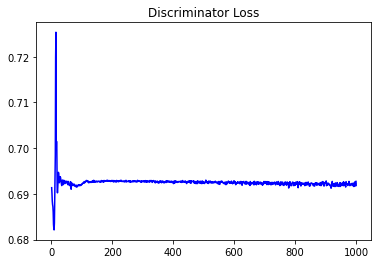

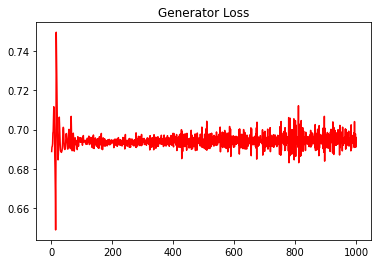

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.552768172059239


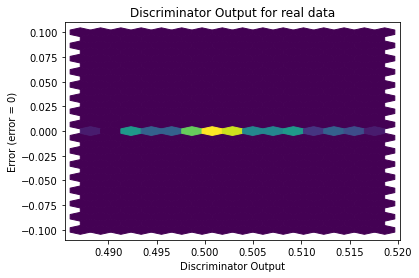

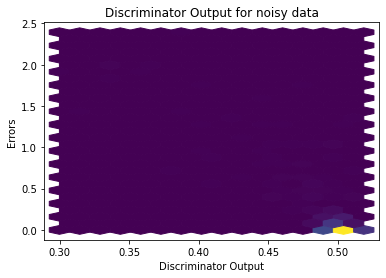

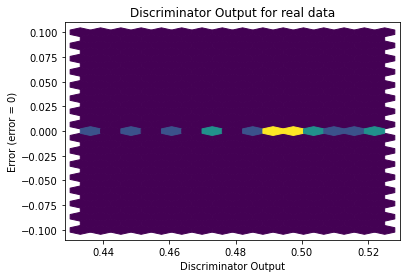

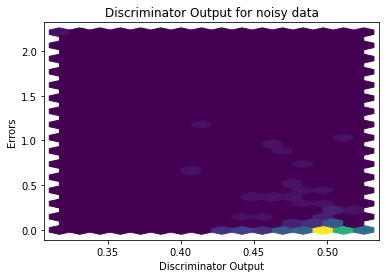

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


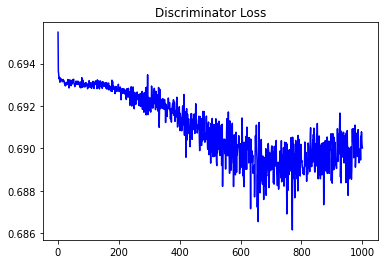

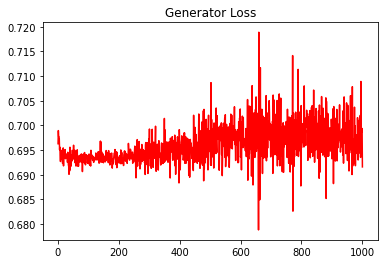

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.503191639342455


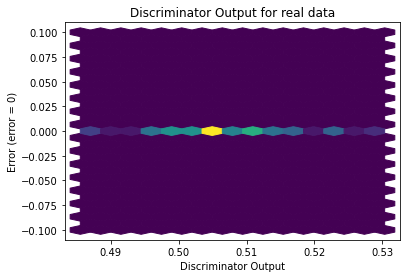

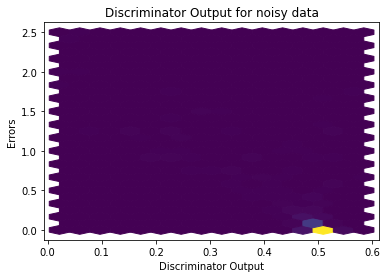

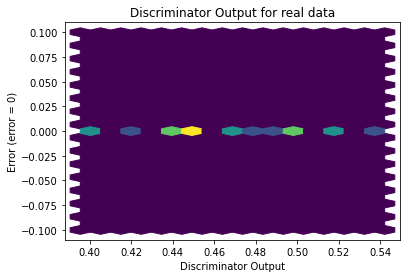

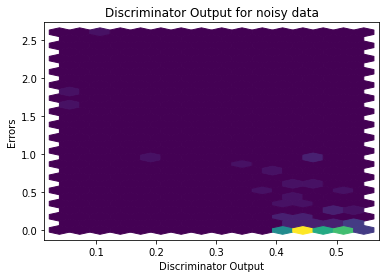

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2026]], requires_grad=True)
